# Machine Learning Model to Predict Stock Market of NSE data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime

In [2]:
df = pd.read_excel("Stockmarket_trainingdataset.xlsx") # Loading the Training data set using pandas
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Data Cleaning(Sanitization)

In [4]:
df.isnull().any() # Finding out whether data is having null values, The output is a boolean value(True or False)
                  #if null values present it will show true in respective column

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [5]:
df = df.dropna() #Dropping the null value contained rows 

In [6]:
df.isnull().any() # after deleting the null vlued filed rows we can see all the columns are showing the output as False

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1475 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1475 non-null   datetime64[ns]
 1   Open       1475 non-null   float64       
 2   High       1475 non-null   float64       
 3   Low        1475 non-null   float64       
 4   Close      1475 non-null   float64       
 5   Adj Close  1475 non-null   float64       
 6   Volume     1475 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 92.2 KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1.475000e+03
mean,11190.630103,11243.279798,11114.862019,11180.224847,11180.224847,3.672148e+05
std,2605.404423,2613.649325,2588.183872,2602.005796,2602.005796,2.277599e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098,0.000000e+00
25%,9362.950195,9404.100098,9290.100097,9315.899902,9315.899902,1.956000e+05
50%,10781.849609,10816.349609,10718.750000,10769.150391,10769.150391,2.906000e+05
75%,11925.699707,11968.899903,11847.475097,11914.125000,11914.125000,5.092500e+05
max,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06


In [9]:
# Converting the date and time stamp series to integer values to avoid error while feeding the data to machine learning model
# and the output will be in the format DDMMYYYYHHMMSS(excluding -,:)

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m%d%H%M%S%f').apply(lambda x: int(x[:-3]))
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,20160104000000000,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,20160105000000000,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,20160106000000000,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,20160107000000000,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,20160108000000000,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


<AxesSubplot:>

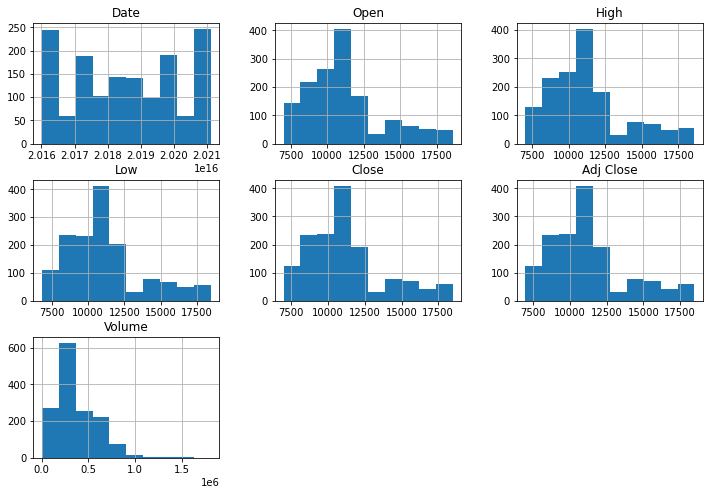

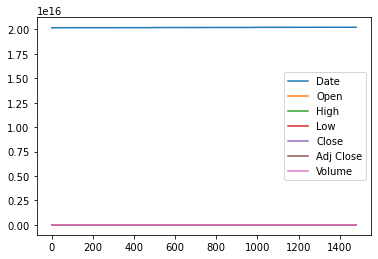

In [10]:
 # Analysing the features by plotting them as individual histograms and then we can analyze the trends between label and features.                                              
viz = df[['Date', 'Open', 'High', 'Low', 'Close','Adj Close','Volume']]
viz.hist(figsize=(12,8))
viz.plot()

# The below graphs are the relation between each feature and label to find out which algorithm is suitable for the data(#Relation Between Each Feature and Label)



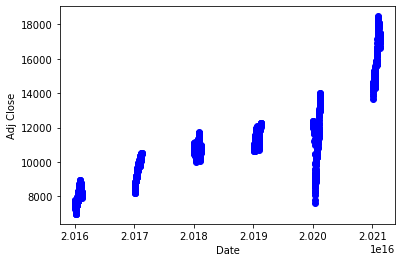

In [167]:
plt.scatter(df.Date,df.Close, color='blue')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.show()


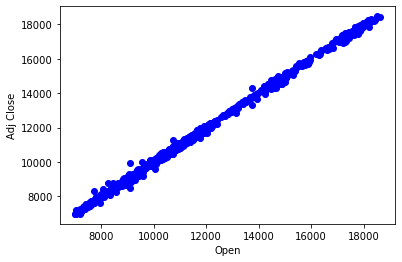

In [168]:
plt.scatter(df.Open,df.Close, color='blue')
plt.xlabel("Open")
plt.ylabel("Adj Close")
plt.show()


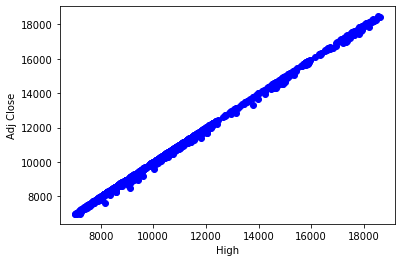

In [169]:
plt.scatter(df.High,df.Close, color='blue')
plt.xlabel("High")
plt.ylabel("Adj Close")
plt.show()


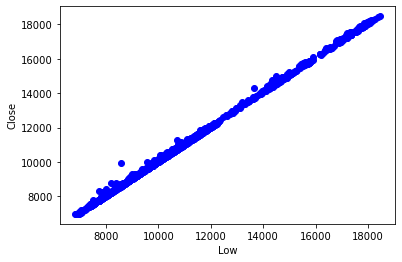

In [170]:
plt.scatter(df.Low,df.Close, color='blue')
plt.xlabel("Low")
plt.ylabel("Close")
plt.show()


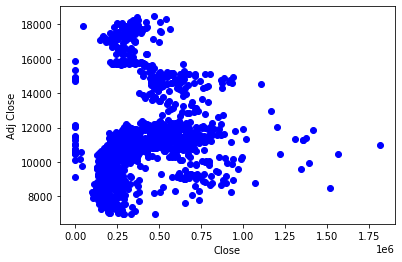

In [171]:
plt.scatter(df.Volume,df.Close, color='blue')
plt.xlabel("Close")
plt.ylabel("Adj Close")
plt.show()


<AxesSubplot:>

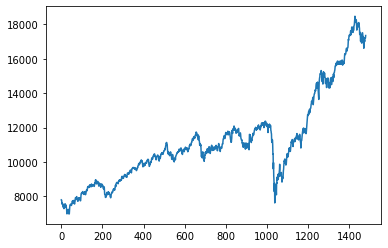

In [172]:
df['Adj Close'].plot()

# Splitting the data to train and test the model

In [17]:
data = np.random.rand(len(df)) < 0.8
train = df[data]
test = df[~data]

# All the above plots shows a linear trend and all the fields values are continous then we came to know that multivariate linear regression model gives the best accuracy while comparing to other

# Training the model using Linear Regression Algorithm

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Date', 'Open', 'High', 'Low', 'Volume']])  # We have removed the feature close to avoid the 
                                                                    #underfitting of model because the data of close and 
                                                                    #Adj close are same

y = np.asanyarray(train[['Adj Close']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-3.64698754e-13 -7.25697554e-01  9.55910690e-01  7.72659307e-01
   2.18822539e-06]]
Intercept:  [7325.97890442]


# Evaluation of Model

In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Date', 'Open', 'High', 'Low', 'Volume']])
test_y = np.asanyarray(test[['Adj Close']])
test_y_ = regr.predict(test_x)

print("R2-score: %.2f" % r2_score(test_y , test_y_) ) # achieved 100 percent accuracy on 20 percent of testing data

R2-score: 1.00


# The graph between actal vs predicted

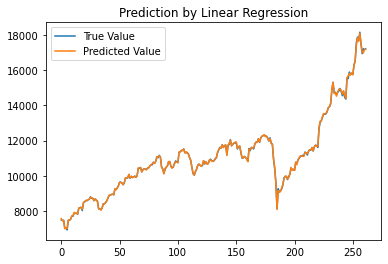

In [23]:
plt.plot(test_y_, label='True Value')
plt.plot(test_y, label='Predicted Value')
plt.title("Prediction by Linear Regression")
plt.legend()
plt.show()  #due to 100 accuracy both are overlapped

# Predecting the test data

In [193]:
df = pd.read_excel("stockmarket_testingdataset.xlsx") #Loading test data

df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
1,2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2,2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
3,2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
4,2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300
5,2022-01-10,17913.300781,18017.449219,17879.150391,18003.300781,18003.300781,232400
6,2022-01-11,17997.750000,18081.250000,17964.400391,18055.750000,18055.750000,220200
7,2022-01-12,18170.400391,18227.949219,18128.800781,18212.349609,18212.349609,245000
8,2022-01-13,18257.000000,18272.250000,18163.800781,18257.800781,18257.800781,303700
9,2022-01-14,18185.000000,18286.949219,18119.650391,18255.750000,18255.750000,229500


In [194]:
# Converting the date time stamp series to integer values to avoid error

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m%d%H%M%S%f').apply(lambda x: int(x[:-3]))
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,20220103000000000,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
1,20220104000000000,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2,20220105000000000,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
3,20220106000000000,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
4,20220107000000000,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300


#  Evaluation of model using Testing data 



In [187]:

from sklearn.metrics import r2_score

test_x = np.asanyarray(df[['Date', 'Open', 'High', 'Low', 'Volume']])
test_y = np.asanyarray(df[['Adj Close']])
test_y_ = regr.predict(test_x)

print("R2-score: %.2f" % r2_score(test_y , test_y_) ) # achieved 97 percent Out of sample accuracy on testing data.

R2-score: 0.97


# Plot - Actual (Adj Close) vs Predicted (Adj Close)

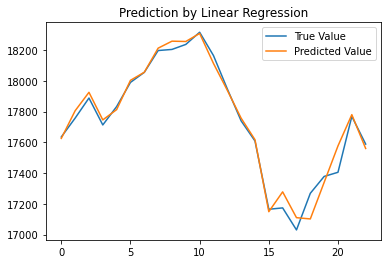

In [190]:
plt.plot(test_y_, label='True Value')
plt.plot(test_y, label='Predicted Value')
plt.title("Prediction by Linear Regression")
plt.legend()
plt.show()